In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [3]:
clinical_train = pd.read_csv("../input/clinical-data/clinical_data.csv")

In [4]:
clinical_train.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554


In [5]:
radiomics_train=pd.read_csv("../input/radiomics/radiomics.csv")
radiomics_train


,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,NaN,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
1,PatientID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
3,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
4,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,2.1267453161798318,336.5736217607421,6761.904880588389,0.8071567846648176,0.0030263471540989176,791.2955059720019,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055
298,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,4.405808671502962,7158.438787435351,18591.140070820802,0.6133359978030384,0.0010222643954205016,1592.1900508318274,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346
299,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,7.254938625898857,4513.100699296329,8467.466888384817,0.511172534658928,0.001134970199763957,1030.1979529954301,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315
300,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,1.2311488388284484,40.14012424787426,1137.721789971685,0.9344729344729346,0.013536519694682055,525.6828294688723,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698


In [6]:
radiomics_train = radiomics_train.drop([0,1], axis = 0)

In [7]:
radiomics_train = radiomics_train.reset_index(drop=True)
radiomics_train

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,1.8243276462412692,683.8697916865876,7978.285175929893,0.8281380543886281,0.00285521581708568,907.0459291041462,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932
4,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,2.6525799815994477,962.0947604240029,7520.054910032022,0.7348979775536406,0.006709923144392347,1513.4204452600534,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,2.1267453161798318,336.5736217607421,6761.904880588389,0.8071567846648176,0.0030263471540989176,791.2955059720019,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055
296,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,4.405808671502962,7158.438787435351,18591.140070820802,0.6133359978030384,0.0010222643954205016,1592.1900508318274,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346
297,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,7.254938625898857,4513.100699296329,8467.466888384817,0.511172534658928,0.001134970199763957,1030.1979529954301,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315
298,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,1.2311488388284484,40.14012424787426,1137.721789971685,0.9344729344729346,0.013536519694682055,525.6828294688723,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698


In [ ]:
#radiomics_train=radiomics_train.iloc[2:,:].rename(columns={'Unnamed: 0': 'PatientID'})
#radiomics_train

In [8]:
outputs=pd.read_csv("../input/outputs/output_VSVxRFU (1).csv")
outputs.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [9]:
y= outputs['SurvivalTime']
y

0      1378
1       379
2       573
3       959
4      2119
       ... 
295    1540
296     946
297     559
298    1952
299     858
Name: SurvivalTime, Length: 300, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(radiomics_train,y,test_size=0.3,random_state=3)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,Y_train)

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, Y_test,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{radiomics_train.columns[i]:<8}"," ",
              f"{r.importances_mean[i]:.3f}"," ",
              f" +/- {r.importances_std[i]:.3f}")

shape      6740.726    +/- 681.457
shape.4    5827.187    +/- 584.276
shape.1    181.138    +/- 18.785
textural.11   169.356    +/- 19.139
shape.3    63.777    +/- 6.174
textural.15   55.544    +/- 5.693
textural   53.563    +/- 4.937
textural.24   38.863    +/- 4.309
firstorder.1   13.264    +/- 1.352
textural.26   12.119    +/- 1.216
firstorder.9   11.726    +/- 1.347
textural.14   11.121    +/- 1.385
firstorder.11   9.898    +/- 1.058
textural.19   9.575    +/- 1.160
textural.18   9.206    +/- 0.892
textural.30   7.930    +/- 0.874
firstorder.5   7.264    +/- 0.835
textural.21   7.069    +/- 0.765
textural.6   5.572    +/- 0.634
textural.8   5.197    +/- 0.743
textural.27   4.450    +/- 0.385
textural.25   4.271    +/- 0.454
textural.7   2.828    +/- 0.395
firstorder.4   1.830    +/- 0.287
firstorder.8   1.089    +/- 0.211
shape.6    0.982    +/- 0.188
textural.12   0.909    +/- 0.219
textural.23   0.865    +/- 0.147
textural.4   0.597    +/- 0.149
textural.28   0.588    +/- 0.119
t

In [14]:
X_train2=X_train[['shape','shape.4','shape.1','textural.11','shape.3','textural.15','textural','textural.24','firstorder.1','textural.26','firstorder.9','textural.14','firstorder.11']]
X_test2=X_test[['shape','shape.4','shape.1','textural.11','shape.3','textural.15','textural','textural.24','firstorder.1','textural.26','firstorder.9','textural.14','firstorder.11']]

In [15]:
model.fit(X_train2,Y_train)

LinearRegression()

In [16]:
y_predict=model.predict(X_test2)

In [17]:
y_predict

array([ 505.66689651, 1267.44900867,   75.52971179, 1787.30262272,
        524.86450659,  662.7336791 ,  676.03135743, 1063.13876069,
       1149.47186793,  676.16728843,  463.87823142,  516.77120243,
       1532.31950604,  893.13028383,  454.82416911,  662.03970711,
        367.64812281,  849.29468659,  422.68657435, 1585.24506351,
        815.46237106,  649.23551303, 1160.97112704,  586.06967243,
        677.27215377,  635.13154584,  788.48394272, 1130.2258637 ,
        445.07136651,  564.35073204, 1095.92690134, 1458.19392232,
        453.61865147,  843.39600321, 1521.03143812, 1105.76177281,
        245.86639132,  526.6701624 ,  886.31504378,  747.41678147,
        620.23258304,  885.85704425,  646.26909194,  636.9715184 ,
       1377.10125163, 1723.15288449, 1083.47860727,  455.63038911,
        617.66725781,  569.75943833, 1307.90710005,  828.97879944,
        844.36714022,  420.19987591,  772.1971683 ,  617.77203005,
       1095.92051585, 1392.76158034,  883.92582356,  570.67588

In [18]:
score=r2_score(Y_test,y_predict)

In [19]:
score

0.17146386407844938

In [20]:
print(f'RMSE on Validation set : {np.sqrt(np.mean(y_predict - Y_test))**2}')

RMSE on Validation set : 53.67420524130227


****random forest****

In [21]:
from sklearn.ensemble import RandomForestRegressor
model_randomF = RandomForestRegressor(max_depth=2, random_state=0)
model_randomF.fit(X_train2,Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [22]:
y_predict_F=model_randomF.predict(X_test2)
y_predict_F

array([ 818.82455879, 1220.52120701,  571.39402902, 1601.60778796,
        576.35873944,  556.77548681,  564.3726564 ,  777.81797081,
       1209.29320006,  585.06425254,  550.80917536,  596.64246305,
       1299.11059207,  553.73035219,  533.40945577,  547.00644154,
        548.86963317,  617.4625761 ,  564.3726564 , 1417.06098712,
       1126.70580439,  560.27384767, 1291.92724257,  641.32558418,
        593.20754401,  569.4242759 ,  593.20754401, 1316.95871433,
        544.66740439,  554.28168738,  596.9386797 , 1417.62198557,
        548.65388093, 1202.13339533, 1893.2960576 , 1245.0079765 ,
        572.89678791,  572.89678791,  600.11497507,  567.01914504,
        644.024599  ,  577.3430315 ,  596.09400114,  574.4865913 ,
       1233.32645498, 1579.66239201, 1241.76272038,  550.26071345,
        558.43177603,  542.22673533, 1253.25588759, 1148.72096744,
        680.65394501,  535.71130311,  588.11280237,  540.3465426 ,
       1318.76467218, 1320.30923021,  598.63954547,  562.96045

In [23]:
print(f'RMSE on Validation set : {np.sqrt(np.mean(y_predict_F - Y_test))**2}')

RMSE on Validation set : 46.14612790409944


****** clinical dataFrame

In [24]:
clinical_train=pd.read_csv("../input/clinical-data/clinical_data.csv")
clinical_train.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554


In [25]:
clinical_train.shape

(300, 7)

In [26]:
clinical_train.isnull().sum()

PatientID         0
Histology        20
Mstage            0
Nstage            0
SourceDataset     0
Tstage            0
age              16
dtype: int64

In [27]:
clinical_train['Histology']=clinical_train['Histology'].fillna(clinical_train['Histology'].mode()[0])
clinical_train['age']=clinical_train['age'].fillna(clinical_train['age'].mean())
clinical_train

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.000000
1,371,large cell,0,2,l1,4,64.572200
2,246,squamous cell carcinoma,0,3,l1,2,66.045200
3,240,nos,0,2,l1,3,59.356600
4,284,squamous cell carcinoma,0,3,l1,4,71.055400
...,...,...,...,...,...,...,...
295,261,squamous cell carcinoma,0,0,l1,1,87.126600
296,298,squamous cell carcinoma,0,0,l1,1,68.766856
297,129,large cell,0,1,l1,3,59.843900
298,273,Adenocarcinoma,0,0,l2,1,70.000000


In [28]:
clinical_train['Histology'].value_counts()

Adenocarcinoma                         100
large cell                              61
squamous cell carcinoma                 59
nos                                     38
adenocarcinoma                          21
Squamous cell carcinoma                 19
NSCLC NOS (not otherwise specified)      2
Name: Histology, dtype: int64

In [31]:
def encodage1(clinical_train):
    code = {'large cell':1,
            'Adenocarcinoma':2,
            'squamous cell carcinoma':3,
            'nos':4,
            'Squamous cell carcinoma':3,
            'adenocarcinoma':2,
            'NSCLC NOS (not otherwise specified)':5,
            'l1':1,
            'l2':2}
    for col in clinical_train.select_dtypes('object').columns:
        clinical_train.loc[:,col] = clinical_train[col].map(code)
        return clinical_train

In [32]:
encodage1(clinical_train)


,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,2,0,0,2,2,66.000000
1,371,1,0,2,1,4,64.572200
2,246,3,0,3,1,2,66.045200
3,240,4,0,2,1,3,59.356600
4,284,3,0,3,1,4,71.055400
...,...,...,...,...,...,...,...
295,261,3,0,0,1,1,87.126600
296,298,3,0,0,1,1,68.766856
297,129,1,0,1,1,3,59.843900
298,273,2,0,0,2,1,70.000000


In [33]:
clinical_train

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,2,0,0,2,2,66.000000
1,371,1,0,2,1,4,64.572200
2,246,3,0,3,1,2,66.045200
3,240,4,0,2,1,3,59.356600
4,284,3,0,3,1,4,71.055400
...,...,...,...,...,...,...,...
295,261,3,0,0,1,1,87.126600
296,298,3,0,0,1,1,68.766856
297,129,1,0,1,1,3,59.843900
298,273,2,0,0,2,1,70.000000


*randomforest pour clinical dataFrame*

In [34]:
CL_X_train,CL_X_test,CL_Y_train,CL_Y_test=train_test_split(clinical_train,y,test_size=0.3,random_state=3)

In [35]:
model_randomF = RandomForestRegressor(max_depth=2, random_state=0)
model_randomF.fit(CL_X_train,CL_Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [36]:
y_predict_F_CL=model_randomF.predict(CL_X_test)
y_predict_F_CL

array([1412.71968573, 1423.01592452,  581.7425041 , 1377.44326183,
        607.53066494,  564.31388085,  579.30201077, 1283.11494386,
       1319.52755169,  685.8813423 ,  621.11996932,  609.70064706,
       1248.10654515,  625.77401446,  622.19028331,  643.05867945,
        624.7173794 ,  591.08856146,  605.18299123, 1368.0555736 ,
       1696.2483676 ,  619.28494277,  629.31475884,  568.95037156,
        592.51924046,  624.02530986,  573.96147704,  673.39613291,
        668.6269005 ,  595.11406388, 1198.63826743, 1387.8272645 ,
        613.67389782, 1394.21419013, 1478.6162036 , 1374.66200139,
        591.56864166,  581.85118199,  610.76855728, 1749.06820527,
        702.12813996,  602.16683664,  617.17475097,  593.98492371,
       1387.8272645 ,  671.19842936, 1808.42305351,  581.7425041 ,
        592.379008  ,  620.0520591 , 1224.99221794, 1451.55106167,
       1802.59717281,  579.63582245,  668.6269005 ,  644.18003473,
        688.38426282, 1374.66200139,  605.00444985,  577.87793

In [37]:
print(f'RMSE on Validation set : {np.sqrt(np.mean(y_predict_F_CL - CL_Y_test))**2}')

RMSE on Validation set : 66.71043863266533


In [38]:
clinical_test=pd.read_csv("../input/clinical-test/clinical_data.csv")
clinical_test.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,nos,0,0,l1,4,44.3970
1,155,adenocarcinoma,0,3,l1,1,63.3183
2,404,large cell,0,2,l1,2,64.7255
3,407,nos,0,0,l1,2,65.3635
4,9,Adenocarcinoma,0,0,l2,2,50.0000


In [39]:
clinical_test.shape

(125, 7)

In [40]:
clinical_test.isna().sum()

PatientID         0
Histology        12
Mstage            0
Nstage            0
SourceDataset     0
Tstage            0
age               4
dtype: int64

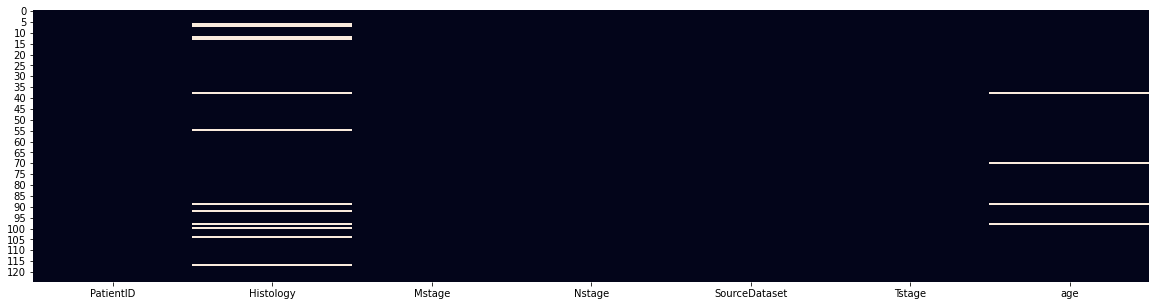

In [41]:
plt.figure(figsize=(20,5))
sns.heatmap(clinical_test.isna(), cbar=False)

In [42]:
clinical_test = clinical_test.dropna(axis=0)
clinical_test

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,nos,0,0,l1,4,44.3970
1,155,adenocarcinoma,0,3,l1,1,63.3183
2,404,large cell,0,2,l1,2,64.7255
3,407,nos,0,0,l1,2,65.3635
4,9,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...
120,66,squamous cell carcinoma,0,2,l1,3,70.7077
121,132,squamous cell carcinoma,0,3,l1,2,51.1595
122,169,Adenocarcinoma,0,1,l2,1,70.0000
123,199,squamous cell carcinoma,0,3,l1,1,70.5106


In [ ]:
clinical_test['Histology'].value_counts()

In [ ]:
clinical_test.dtypes

In [ ]:
def encodage(clinical_test):
    code = {'large cell':1,
            'Adenocarcinoma':2,
            'squamous cell carcinoma':3,
            'nos':4,
            'Squamous cell carcinoma':3,
            'adenocarcinoma':2,
            'NSCLC NOS (not otherwise specified)':5,
            'l1':1,
            'l2':2}
    for col in clinical_test.select_dtypes('object').columns:
        clinical_test.loc[:,col] = clinical_test[col].map(code)
        return clinical_test

In [ ]:
encodage(clinical_test)

In [ ]:
radiomics_train

# #concaténation des dataframe

In [144]:
import pandas as pd
clinical_train = pd.read_csv("../input/clinical-data/clinical_data.csv")
radiomics_train = pd.read_csv("../input/radiomics/radiomics.csv")



In [145]:
radiomics_train=radiomics_train.iloc[2:,:].rename(columns={'Unnamed: 0': 'PatientID'})
radiomics_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
2,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,1.4579804820599591,555.3785937091678,14592.30372702833,0.8913295337029291,0.003561530161295479,954.7491354587909,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885
3,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,2.5121246601768097,1766.6193730958223,22881.93268598017,0.7660321748303586,0.002246203831804831,1092.8237238353574,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547
4,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,4.096837887896892,3462.816343789217,18773.106002343673,0.6445541733928403,0.0018803220646738058,878.9896008279054,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498
5,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,1.8243276462412692,683.8697916865876,7978.285175929893,0.8281380543886281,0.00285521581708568,907.0459291041462,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932
6,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,2.6525799815994477,962.0947604240029,7520.054910032022,0.7348979775536406,0.006709923144392347,1513.4204452600534,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,2.1267453161798318,336.5736217607421,6761.904880588389,0.8071567846648176,0.0030263471540989176,791.2955059720019,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055
298,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,4.405808671502962,7158.438787435351,18591.140070820802,0.6133359978030384,0.0010222643954205016,1592.1900508318274,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346
299,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,7.254938625898857,4513.100699296329,8467.466888384817,0.511172534658928,0.001134970199763957,1030.1979529954301,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315
300,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,1.2311488388284484,40.14012424787426,1137.721789971685,0.9344729344729346,0.013536519694682055,525.6828294688723,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698


In [146]:
radiomics_train['PatientID']=radiomics_train['PatientID'].astype(np.int64)


In [147]:
df_train=pd.merge(radiomics_train,clinical_train, on='PatientID', how='inner')
df_train


,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,l2,2,66.0000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,l1,4,64.5722
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932,nos,0,2,l1,3,59.3566
4,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174,squamous cell carcinoma,0,3,l1,4,71.0554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055,squamous cell carcinoma,0,0,l1,1,87.1266
296,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346,squamous cell carcinoma,0,0,l1,1,NaN
297,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315,large cell,0,1,l1,3,59.8439
298,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698,Adenocarcinoma,0,0,l2,1,70.0000


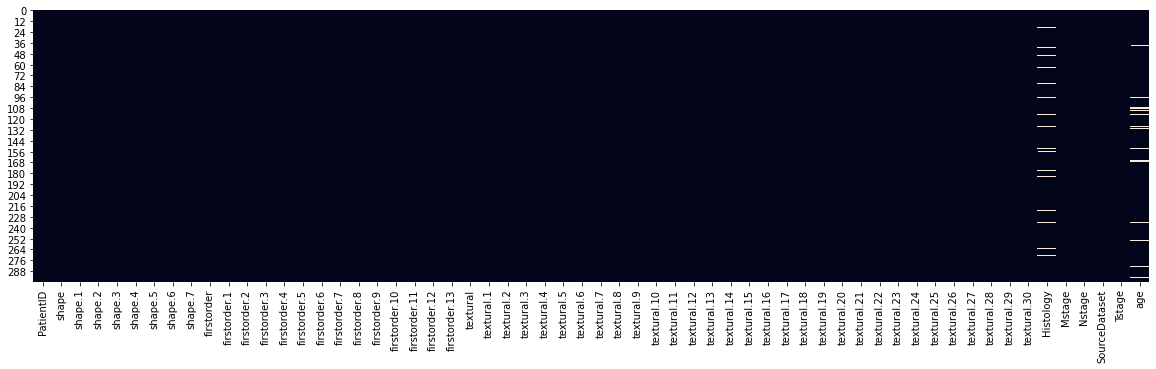

In [92]:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isna(), cbar=False)

In [47]:
df_train.isna().sum()

PatientID         0
shape             0
shape.1           0
shape.2           0
shape.3           0
shape.4           0
shape.5           0
shape.6           0
shape.7           0
firstorder        0
firstorder.1      0
firstorder.2      0
firstorder.3      0
firstorder.4      0
firstorder.5      0
firstorder.6      0
firstorder.7      0
firstorder.8      0
firstorder.9      0
firstorder.10     0
firstorder.11     0
firstorder.12     0
firstorder.13     0
textural          0
textural.1        0
textural.2        0
textural.3        0
textural.4        0
textural.5        0
textural.6        0
textural.7        0
textural.8        0
textural.9        0
textural.10       0
textural.11       0
textural.12       0
textural.13       0
textural.14       0
textural.15       0
textural.16       0
textural.17       0
textural.18       0
textural.19       0
textural.20       0
textural.21       0
textural.22       0
textural.23       0
textural.24       0
textural.25       0
textural.26       0


In [148]:
df_train['Histology']=df_train['Histology'].fillna(df_train['Histology'].mode()[0])
df_train['age']=clinical_train['age'].fillna(df_train['age'].mean())
df_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,l2,2,66.000000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,l1,4,64.572200
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,l1,2,66.045200
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932,nos,0,2,l1,3,59.356600
4,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174,squamous cell carcinoma,0,3,l1,4,71.055400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055,squamous cell carcinoma,0,0,l1,1,87.126600
296,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346,squamous cell carcinoma,0,0,l1,1,68.766856
297,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315,large cell,0,1,l1,3,59.843900
298,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698,Adenocarcinoma,0,0,l2,1,70.000000


In [ ]:
df_train.iloc[:, 54]

In [49]:
#df_train = df_train.drop(PatientID, axis=1)

In [149]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
df_train.iloc[:, 57] = labelencoder_x.fit_transform(df_train.iloc[:, 57]) #applying histology
df_train.head()

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,Adenocarcinoma,0,0,1,2,66.0000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,large cell,0,2,0,4,64.5722
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,squamous cell carcinoma,0,3,0,2,66.0452
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932,nos,0,2,0,3,59.3566
4,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174,squamous cell carcinoma,0,3,0,4,71.0554


In [150]:
labelencoder_x = LabelEncoder()
df_train.iloc[:, 54] = labelencoder_x.fit_transform(df_train.iloc[:, 54]) #applying histology
df_train

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,0.027815034276150445,0.274891584789629,48.55924216871593,1.5379640537333283,0.650210255286885,5431.333209994288,0.2752277631406584,19786.0,3942944085.0,...,0.00338435209269195,851.9873727726894,0.0044435855454578775,1651.7107610742885,0,0,0,1,2,66.000000
1,371,0.023015490265467994,0.18821000537331142,75.70336848516055,1.744961158341729,0.5730786586392099,10369.568728926952,0.240726823947402,43168.0,3122890068.0,...,0.0020694221485567173,884.838627165461,0.0036327469226913886,3386.995589481547,4,0,2,0,4,64.572200
2,246,0.02734810613893409,0.26573989535056836,70.43436661176133,1.5554202430337098,0.6429130676926181,10558.818691399667,0.20076598812381322,52655.0,1059535256.0,...,0.0016345955500716887,634.9100359203011,0.00486911711499068,4232.41808034498,6,0,3,0,2,66.045200
3,240,0.026811108023238883,0.2554063972936345,46.8187996428785,1.5761204705010834,0.634469267239501,4221.412123045331,0.3238779820439811,13074.0,658332446.0,...,0.0026795331834220766,774.8853866820536,0.003900898967927439,1844.746046182932,5,0,2,0,3,59.356600
4,284,0.02369124102797724,0.19942420455106544,53.79591062525106,1.7116200972821958,0.5842417961718578,5295.900331416721,0.3272407286073298,16237.0,807253170.0,...,0.0047041135494313106,1197.1408999024193,0.023272656916216904,4444.272811805174,6,0,3,0,4,71.055400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,261,0.03575188711388587,0.45415090808431535,36.61966684720111,1.3009679701731398,0.7686584319727061,3143.9726790843724,0.2814405764107396,11204.0,1299545944.0,...,0.002828847859846127,659.1032797198598,0.0044000796957435195,2243.6893178491055,6,0,0,0,1,87.126600
296,298,0.011765215791089918,0.049181530602555854,122.53162856993292,2.7293924539047882,0.366381902525361,20785.949532147188,0.33261377571233763,62744.0,395285569.0,...,0.0008124873030212564,1123.462319898394,0.003265340148316901,7145.459719145346,6,0,0,0,1,68.766856
297,129,0.02566821368023103,0.23409575485173154,64.87680633323437,1.6225651878273755,0.6163080580688447,9571.675019754168,0.224665013016222,42663.0,122782699.0,...,0.0007836233063791739,637.7185435233446,0.00698335929515609,7752.5995085659315,4,0,1,0,3,59.843900
298,273,0.032517473207570785,0.37569535736332355,22.47220505424423,1.3858664798722369,0.7215702338743268,820.2763699826999,0.6057984699998399,1377.0,425358564.0,...,0.012984101326838195,486.59883351270753,0.016086073572940784,726.9455636570698,0,0,0,1,1,70.000000


In [54]:
X_train_v=df_train[['SourceDataset','firstorder.5','firstorder.4' ,'firstorder.1']]
X_train_v

,SourceDataset,firstorder.5,firstorder.4,firstorder.1
0,1,288.3111051364939,-310.85803093096126,5.138062382118321
1,0,191.39515446804003,-134.4298091178651,4.461053722332744
2,0,94.1321357821617,-54.136093438419906,3.437110589654181
3,0,149.07299773153227,-118.70552241089185,4.3525641618756525
4,0,143.21023144238694,-67.20194617232248,4.055700408847022
...,...,...,...,...
295,0,214.21231012130238,-238.76847554444842,4.747964393386922
296,0,35.924669959446064,10.986086319010584,2.7161802055689606
297,0,27.675471302151784,20.628577455875114,2.368996645158086
298,1,273.93507403768416,-464.3674655047204,5.129263901372518


In [52]:
#df_train = df_train.drop('PatientID', axis=1)

In [55]:
outputs=pd.read_csv("../input/outputs/output_VSVxRFU (1).csv")
outputs.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [56]:
y= outputs['SurvivalTime']
y

0      1378
1       379
2       573
3       959
4      2119
       ... 
295    1540
296     946
297     559
298    1952
299     858
Name: SurvivalTime, Length: 300, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train_v,y,test_size=0.3,random_state=3)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor


reg=HistGradientBoostingRegressor()
reg.fit(X_train,Y_train)



HistGradientBoostingRegressor()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


from sklearn.inspection import permutation_importance
r = permutation_importance(reg, X_test, Y_test,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_train.columns[i]:<8}"," ",
              f"{r.importances_mean[i]:.3f}"," ",
              f" +/- {r.importances_std[i]:.3f}")

PatientID   1.027    +/- 0.183
shape      0.287    +/- 0.090
shape.2    0.091    +/- 0.036


In [63]:
Y_validat=reg.predict(X_test)
Y_validat

array([1462.91761079, 1096.0671815 ,  452.58408594, 1882.03643577,
        713.01020437,  698.07659406,  682.70417752, 1779.49040861,
       1092.17811192,  350.72603144,  198.98027112,  839.25009634,
       1359.20863034,  701.72357771,  432.56575257,  431.15390125,
        541.66275137,  666.81881153,  209.83473556,  856.0555498 ,
        861.15513056,  555.73570656, 1027.3361825 ,  463.26986841,
        461.87237809,  883.33863029, 1005.3578549 ,  763.48265492,
        432.56575257,  682.70417752, 1978.78409537, 1637.27126574,
        980.1990063 , 1149.57121478, 1857.97406838, 1125.33416489,
        587.20338155,  593.99402352,  463.26986841, 1946.63656838,
        785.14725319,  843.39245844,  463.26986841,  281.86405364,
       1348.47364116,  964.20626123, 1232.77491615,  125.22627511,
        815.16877773,  874.52890105, 1221.32340529,  854.01378326,
       1221.32340529,  554.726192  ,  722.23505725,  547.09579993,
        910.50069213, 2199.39579854,  884.03616964,  766.21026

In [64]:
score=r2_score(Y_test,Y_validat)
score

0.361709479770254

In [65]:
from sklearn import metrics

from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(Y_test, Y_validat))

20.26344211933763

#  concaténation de test dataframe

In [138]:
radiomics_test=pd.read_csv("../input/radiomics-test/radiomics.csv")
clinical_test=pd.read_csv("../input/clinical-test/clinical_data.csv")
clinical_test

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,nos,0,0,l1,4,44.3970
1,155,adenocarcinoma,0,3,l1,1,63.3183
2,404,large cell,0,2,l1,2,64.7255
3,407,nos,0,0,l1,2,65.3635
4,9,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...
120,66,squamous cell carcinoma,0,2,l1,3,70.7077
121,132,squamous cell carcinoma,0,3,l1,2,51.1595
122,169,Adenocarcinoma,0,1,l2,1,70.0000
123,199,squamous cell carcinoma,0,3,l1,1,70.5106


In [139]:
radiomics_test

,Unnamed: 0,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
0,NaN,original_shape_Compactness1,original_shape_Compactness2,original_shape_Maximum3DDiameter,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_Energy,...,original_glrlm_LongRunEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis
1,PatientID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,013,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,...,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358
3,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,...,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265
4,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,...,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,066,0.018264569018517914,0.11852804023640665,107.68936809174804,2.035758696631086,0.49121735383219484,27445.8265133016,0.18645647861248218,147333.0,4677261426.0,...,2.7697185598824325,7413.218281172949,64292.66183749758,0.721668705480886,0.001134817458582216,1304.8326969287862,0.0009590780261227756,1037.1711282148326,0.002582194041621448,3720.340006420675
123,132,0.030501033920975074,0.3305455910105498,66.23443213314356,1.4462927542202113,0.6914229481424484,10846.408583588895,0.17761004416212725,61130.0,2332007556.0,...,5.615411222870203,3368.3667530678404,18707.945522670652,0.5872415658936189,0.0015644653802224127,1590.1534645007484,0.001362077222646469,1106.804922816713,0.004467699512707222,10587.822307680453
124,169,0.03377199143713095,0.4052430609931226,33.301651610693426,1.3513301636534356,0.7400116025652942,2984.694045160819,0.3057866235965612,9795.0,203604658.0,...,1.433178366117119,643.3081662554068,6995.460108386899,0.8868732084658576,0.0012410242467100986,1118.204804000809,0.0011693490383230724,1016.4476606894169,0.0016091220283429286,1649.9494057838579
125,199,0.015289692505556092,0.0830614959910896,140.24977718342373,2.2919233212118795,0.43631477141706426,3619.332518803919,0.6133552259290223,5957.0,80547231.0,...,3.524248234703012,502.4681324453668,2148.280751649878,0.6666494492581448,0.0021013002598251123,955.3385623888661,0.0018609987983189413,689.4478187210952,0.004447930134199625,3770.308303983816


In [140]:
radiomics_test=radiomics_test.iloc[2:,:].rename(columns={'Unnamed: 0': 'PatientID'})
radiomics_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
2,013,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,...,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358
3,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,...,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265
4,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,...,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343
5,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,...,2.902585983552506,1147.928169625991,6094.8055835410405,0.7114666354533556,0.0021042753512783884,1533.2177880035028,0.0018997254630333837,1182.8763633701415,0.003685003163801367,4776.549407884615
6,009,0.017814538285697575,0.1127590447058208,56.542019772908716,2.069900823752435,0.4831149340706782,7093.365689658921,0.37603157853867447,18942.0,9108915274.0,...,1.195504779594246,652.0713671481254,15924.101510304838,0.942025454220576,0.01928124971242974,344.20578608557054,0.01822101655661966,331.90121216251634,0.024175162483351866,400.01584748374046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,066,0.018264569018517914,0.11852804023640665,107.68936809174804,2.035758696631086,0.49121735383219484,27445.8265133016,0.18645647861248218,147333.0,4677261426.0,...,2.7697185598824325,7413.218281172949,64292.66183749758,0.721668705480886,0.001134817458582216,1304.8326969287862,0.0009590780261227756,1037.1711282148326,0.002582194041621448,3720.340006420675
123,132,0.030501033920975074,0.3305455910105498,66.23443213314356,1.4462927542202113,0.6914229481424484,10846.408583588895,0.17761004416212725,61130.0,2332007556.0,...,5.615411222870203,3368.3667530678404,18707.945522670652,0.5872415658936189,0.0015644653802224127,1590.1534645007484,0.001362077222646469,1106.804922816713,0.004467699512707222,10587.822307680453
124,169,0.03377199143713095,0.4052430609931226,33.301651610693426,1.3513301636534356,0.7400116025652942,2984.694045160819,0.3057866235965612,9795.0,203604658.0,...,1.433178366117119,643.3081662554068,6995.460108386899,0.8868732084658576,0.0012410242467100986,1118.204804000809,0.0011693490383230724,1016.4476606894169,0.0016091220283429286,1649.9494057838579
125,199,0.015289692505556092,0.0830614959910896,140.24977718342373,2.2919233212118795,0.43631477141706426,3619.332518803919,0.6133552259290223,5957.0,80547231.0,...,3.524248234703012,502.4681324453668,2148.280751649878,0.6666494492581448,0.0021013002598251123,955.3385623888661,0.0018609987983189413,689.4478187210952,0.004447930134199625,3770.308303983816


In [141]:
radiomics_test['PatientID']=radiomics_test['PatientID'].astype(np.int64)

In [142]:
df_test=pd.merge(radiomics_test,clinical_test, on='PatientID', how='inner')
df_test


,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,...,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,nos,0,0,l1,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,...,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,adenocarcinoma,0,3,l1,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,...,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,large cell,0,2,l1,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,...,0.0018997254630333837,1182.8763633701415,0.003685003163801367,4776.549407884615,nos,0,0,l1,2,65.3635
4,9,0.017814538285697575,0.1127590447058208,56.542019772908716,2.069900823752435,0.4831149340706782,7093.365689658921,0.37603157853867447,18942.0,9108915274.0,...,0.01822101655661966,331.90121216251634,0.024175162483351866,400.01584748374046,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,66,0.018264569018517914,0.11852804023640665,107.68936809174804,2.035758696631086,0.49121735383219484,27445.8265133016,0.18645647861248218,147333.0,4677261426.0,...,0.0009590780261227756,1037.1711282148326,0.002582194041621448,3720.340006420675,squamous cell carcinoma,0,2,l1,3,70.7077
121,132,0.030501033920975074,0.3305455910105498,66.23443213314356,1.4462927542202113,0.6914229481424484,10846.408583588895,0.17761004416212725,61130.0,2332007556.0,...,0.001362077222646469,1106.804922816713,0.004467699512707222,10587.822307680453,squamous cell carcinoma,0,3,l1,2,51.1595
122,169,0.03377199143713095,0.4052430609931226,33.301651610693426,1.3513301636534356,0.7400116025652942,2984.694045160819,0.3057866235965612,9795.0,203604658.0,...,0.0011693490383230724,1016.4476606894169,0.0016091220283429286,1649.9494057838579,Adenocarcinoma,0,1,l2,1,70.0000
123,199,0.015289692505556092,0.0830614959910896,140.24977718342373,2.2919233212118795,0.43631477141706426,3619.332518803919,0.6133552259290223,5957.0,80547231.0,...,0.0018609987983189413,689.4478187210952,0.004447930134199625,3770.308303983816,squamous cell carcinoma,0,3,l1,1,70.5106


In [72]:
df_test.isna().sum()

PatientID         0
shape             0
shape.1           0
shape.2           0
shape.3           0
shape.4           0
shape.5           0
shape.6           0
shape.7           0
firstorder        0
firstorder.1      0
firstorder.2      0
firstorder.3      0
firstorder.4      0
firstorder.5      0
firstorder.6      0
firstorder.7      0
firstorder.8      0
firstorder.9      0
firstorder.10     0
firstorder.11     0
firstorder.12     0
firstorder.13     0
textural          0
textural.1        0
textural.2        0
textural.3        0
textural.4        0
textural.5        0
textural.6        0
textural.7        0
textural.8        0
textural.9        0
textural.10       0
textural.11       0
textural.12       0
textural.13       0
textural.14       0
textural.15       0
textural.16       0
textural.17       0
textural.18       0
textural.19       0
textural.20       0
textural.21       0
textural.22       0
textural.23       0
textural.24       0
textural.25       0
textural.26       0


In [143]:
df_test['Histology']=df_test['Histology'].fillna(df_test['Histology'].mode()[0])
df_test['age']=clinical_test['age'].fillna(df_test['age'].mean())
df_test

,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,...,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,nos,0,0,l1,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,...,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,adenocarcinoma,0,3,l1,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,...,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,large cell,0,2,l1,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,...,0.0018997254630333837,1182.8763633701415,0.003685003163801367,4776.549407884615,nos,0,0,l1,2,65.3635
4,9,0.017814538285697575,0.1127590447058208,56.542019772908716,2.069900823752435,0.4831149340706782,7093.365689658921,0.37603157853867447,18942.0,9108915274.0,...,0.01822101655661966,331.90121216251634,0.024175162483351866,400.01584748374046,Adenocarcinoma,0,0,l2,2,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,66,0.018264569018517914,0.11852804023640665,107.68936809174804,2.035758696631086,0.49121735383219484,27445.8265133016,0.18645647861248218,147333.0,4677261426.0,...,0.0009590780261227756,1037.1711282148326,0.002582194041621448,3720.340006420675,squamous cell carcinoma,0,2,l1,3,70.7077
121,132,0.030501033920975074,0.3305455910105498,66.23443213314356,1.4462927542202113,0.6914229481424484,10846.408583588895,0.17761004416212725,61130.0,2332007556.0,...,0.001362077222646469,1106.804922816713,0.004467699512707222,10587.822307680453,squamous cell carcinoma,0,3,l1,2,51.1595
122,169,0.03377199143713095,0.4052430609931226,33.301651610693426,1.3513301636534356,0.7400116025652942,2984.694045160819,0.3057866235965612,9795.0,203604658.0,...,0.0011693490383230724,1016.4476606894169,0.0016091220283429286,1649.9494057838579,Adenocarcinoma,0,1,l2,1,70.0000
123,199,0.015289692505556092,0.0830614959910896,140.24977718342373,2.2919233212118795,0.43631477141706426,3619.332518803919,0.6133552259290223,5957.0,80547231.0,...,0.0018609987983189413,689.4478187210952,0.004447930134199625,3770.308303983816,squamous cell carcinoma,0,3,l1,1,70.5106


In [131]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
df_test.iloc[:, 57] = labelencoder_x.fit_transform(df_test.iloc[:, 57]) #applying histology
df_test.iloc[:, 54] = labelencoder_x.fit_transform(df_test.iloc[:, 54]) 
df_test


,PatientID,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,...,textural.27,textural.28,textural.29,textural.30,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,13,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,...,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358,5,0,0,0,4,44.3970
1,155,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,...,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265,3,0,3,0,1,63.3183
2,404,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,...,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343,4,0,2,0,2,64.7255
3,407,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,...,0.0018997254630333837,1182.8763633701415,0.003685003163801367,4776.549407884615,5,0,0,0,2,65.3635
4,9,0.017814538285697575,0.1127590447058208,56.542019772908716,2.069900823752435,0.4831149340706782,7093.365689658921,0.37603157853867447,18942.0,9108915274.0,...,0.01822101655661966,331.90121216251634,0.024175162483351866,400.01584748374046,0,0,0,1,2,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,66,0.018264569018517914,0.11852804023640665,107.68936809174804,2.035758696631086,0.49121735383219484,27445.8265133016,0.18645647861248218,147333.0,4677261426.0,...,0.0009590780261227756,1037.1711282148326,0.002582194041621448,3720.340006420675,6,0,2,0,3,70.7077
121,132,0.030501033920975074,0.3305455910105498,66.23443213314356,1.4462927542202113,0.6914229481424484,10846.408583588895,0.17761004416212725,61130.0,2332007556.0,...,0.001362077222646469,1106.804922816713,0.004467699512707222,10587.822307680453,6,0,3,0,2,51.1595
122,169,0.03377199143713095,0.4052430609931226,33.301651610693426,1.3513301636534356,0.7400116025652942,2984.694045160819,0.3057866235965612,9795.0,203604658.0,...,0.0011693490383230724,1016.4476606894169,0.0016091220283429286,1649.9494057838579,0,0,1,1,1,70.0000
123,199,0.015289692505556092,0.0830614959910896,140.24977718342373,2.2919233212118795,0.43631477141706426,3619.332518803919,0.6133552259290223,5957.0,80547231.0,...,0.0018609987983189413,689.4478187210952,0.004447930134199625,3770.308303983816,6,0,3,0,1,70.5106


In [75]:
X_test_v=df_test[['SourceDataset','firstorder.5','firstorder.4' ,'firstorder.1']]

In [95]:
X_test_v = sc.transform(X_test_v)

In [77]:
Y_val=reg.predict(X_test_v)
Y_val

array([ 432.56575257,  517.73131778,  765.86253153,  565.81222047,
       2120.72651964,  557.31551482,  557.31551482,  125.44342274,
        771.15477162,  431.15390125, 1797.14655238,  935.11429968,
        566.69455534,  665.94489324,  558.74360578,  431.15390125,
        750.25040117,  456.48254995,  463.26986841, 1227.34113402,
       2021.90635438, 1063.65119882,  747.23888881, 1630.81517716,
       1646.62302431,  289.69753346,  526.24611841,  549.76041523,
        928.57956064, 2119.2020714 ,  666.81881153, 1145.64372072,
        784.84626974, 1053.0730918 ,  697.50662691, 1190.36044977,
        463.26986841,  505.45777109,  387.10040461,  631.51534447,
        433.23333008, 1245.174234  ,  448.73855112, 1668.17670108,
       1417.50300883,  747.31863818,  516.3916841 , 1830.44958279,
       1761.81231927, 1640.9653967 ,  966.77743892, 1015.7156286 ,
        400.44978541, 1092.24337251,  488.17826565,  954.01145651,
        549.02614551,  619.74451839,  713.55328929,  664.97857

In [78]:
submission = pd.DataFrame({'PatientID':df_test['PatientID'] ,'SurvivalTime':Y_val})
submission['Event'] = 'nan'
submission.head()

,PatientID,SurvivalTime,Event
0,13,432.565753,nan
1,155,517.731318,nan
2,404,765.862532,nan
3,407,565.812220,nan
4,9,2120.726520,nan


In [79]:
filename = 'lung_cancerPredi.csv'

submission.to_csv(filename,index=False,sep=',')

print('Saved file: ' + filename)

Saved file: lung_cancerPredi.csv


In [ ]:
outputs

# linear regression

In [101]:
X_train_lin=df_train[['shape','shape.4','shape.1','textural.11','shape.3','textural.15','textural','textural.24','firstorder.1','textural.26','firstorder.9','textural.14','firstorder.11']]

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train_lin,y,test_size=0.3,random_state=3)

290     104
57      756
149     448
298    1952
175    1070
       ... 
277    1134
256     991
131     300
249      66
152    1145
Name: SurvivalTime, Length: 210, dtype: int64

In [108]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [109]:
y_valid=model.predict(X_test)
y_valid

array([ 505.66689651, 1267.44900867,   75.52971179, 1787.30262272,
        524.86450659,  662.7336791 ,  676.03135743, 1063.13876069,
       1149.47186793,  676.16728843,  463.87823142,  516.77120243,
       1532.31950604,  893.13028383,  454.82416911,  662.03970711,
        367.64812281,  849.29468659,  422.68657435, 1585.24506351,
        815.46237106,  649.23551303, 1160.97112704,  586.06967243,
        677.27215377,  635.13154584,  788.48394272, 1130.2258637 ,
        445.07136651,  564.35073204, 1095.92690134, 1458.19392232,
        453.61865147,  843.39600321, 1521.03143812, 1105.76177281,
        245.86639132,  526.6701624 ,  886.31504378,  747.41678147,
        620.23258304,  885.85704425,  646.26909194,  636.9715184 ,
       1377.10125163, 1723.15288449, 1083.47860727,  455.63038911,
        617.66725781,  569.75943833, 1307.90710005,  828.97879944,
        844.36714022,  420.19987591,  772.1971683 ,  617.77203005,
       1095.92051585, 1392.76158034,  883.92582356,  570.67588

In [110]:
score=r2_score(Y_test,y_valid)
score

0.17146386407844938

In [112]:
from sklearn import metrics

In [113]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(Y_test, y_valid))

21.498410916250947

# MLPregressor

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_train,y,test_size=0.3,random_state=3)

In [152]:
X_train.shape

(210, 60)

In [153]:
from sklearn.neural_network import MLPRegressor 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [154]:
X_train_M=X_train[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]
X_test_M=X_test[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]

In [155]:
X_train_M

,textural.11,textural.10,shape,shape.4,textural.7,textural.25,textural.24,textural.27,age,Tstage,Histology
290,0.3113353433319419,0.3876177332834311,0.029743348169861458,0.6799244395953775,3.51482462404575,0.0033722335523886505,0.8725238502741595,0.0032268677084459326,80.963700,1,3
57,0.4839789631306265,0.5361178480475155,0.023125198109853615,0.5748983427186263,1.87074691679746,0.0019540490205195663,0.7432221894480949,0.0017538568834044336,83.400400,2,4
149,0.24544868191348207,0.32945443629165566,0.02767498459445648,0.6480258652095917,4.462039384266232,0.008822013659229895,0.9066369234518377,0.007204373561696824,66.915800,1,6
298,0.19285353233525285,0.27270083471038364,0.032517473207570785,0.7215702338743268,6.580867652484712,0.013536519694682055,0.9344729344729346,0.012984101326838195,70.000000,1,0
175,0.5760053183814938,0.6140717505373315,0.017030624933490775,0.468836201262179,1.5126246735959687,0.001764765010349092,0.6629867344691276,0.0015270324342680182,72.698200,1,6
...,...,...,...,...,...,...,...,...,...,...,...
277,0.1991577700307361,0.2782941993408153,0.022433468107880748,0.5633760248918109,7.235350793330112,0.043251689101485954,0.9281383985924868,0.03787834498432876,65.000000,3,0
256,0.1644273783272953,0.24513429354120875,0.02530439992246329,0.6104706335537807,7.512861886325812,0.007476647452322597,0.9491249491249492,0.007290184184787885,64.000000,2,0
131,0.3569839421028477,0.4249453027930659,0.028263024205866325,0.6571731870099212,3.4557976559578396,0.005426088208477379,0.8444322716957507,0.005173378501218134,68.766856,1,5
249,0.2507629963087567,0.3330633343150007,0.01964996305367364,0.5157531717810727,4.634074710212259,0.004591034980452633,0.9093539906480163,0.004356115679146495,79.000000,2,0


In [156]:
sc = StandardScaler()
X_train_M= sc.fit_transform(X_train)
X_test_M=sc.fit_transform(X_test)

In [157]:
nn=MLPRegressor(hidden_layer_sizes=(100,), activation='relu', max_iter=100, batch_size=5 ,solver='adam',shuffle=True)

In [158]:
nn.fit(X_train_M,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(batch_size=5, max_iter=100)

In [159]:
Y_validat=nn.predict(X_test_M)
Y_validat

array([ 415.16593266, 1420.26521876,   43.70135081, 1972.62100239,
        321.26068509,  506.73569915,  463.82455261, 1336.62442229,
       1252.36022068,  702.13346199,  615.584248  ,  438.4333359 ,
       1673.16455851,  558.13583521,  495.38202126,  661.98127075,
        506.6392742 ,  526.92485955,  440.33602604, 1759.09562023,
        842.94882189,  617.70690633, 1045.83189938,  319.79767272,
        384.42092032,  573.9411654 ,  467.9423012 , 1058.92208819,
        618.40179868,  496.36313693, 1508.82884618, 1763.02660187,
        475.59947954, 1028.55041868, 2146.85847216, 1353.23036063,
        113.10406289,  279.44998968,  558.37228236,  810.87526334,
        364.97948835,  763.10105709,  595.72531592,  326.1823018 ,
       1494.67268852, 1435.21127643, 1264.3510903 ,  320.34889441,
        568.26736749,  714.50944024, 1545.35784153,  804.88720871,
       1095.1300856 ,  385.4976543 ,  492.29928988,  739.1522839 ,
       1230.59371606, 1571.6894004 ,  639.55888856,  445.40105

In [160]:
score=r2_score(Y_test,Y_validat)
score

0.35226900738813005

In [161]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_validat))

536.5101301752572

# Artificial Neural Networks

In [162]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [163]:
X_train_M=df_train[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]

In [165]:
#df_train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train_M,y,test_size=0.3,random_state=3)

In [166]:
X_train = X_train.astype('float64')
Y_train=Y_train.astype('float64')
X_test=X_test.astype('float64')
Y_test=Y_test.astype('float64')

In [167]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test.shape

(90, 11)

In [168]:
model = Sequential()
model.add(Dense(10, activation='relu',input_dim = 11))
model.add(Dense(5, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(5, activation='relu'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), metrics=[tf.keras.metrics.RootMeanSquaredError()], loss='mse')


history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=4, epochs = 50 ,shuffle=True)


Epoch 1/50
53/53 [==============================] - 0s 5ms/step - loss: 1338679.7500 - root_mean_squared_error: 1157.0133 - val_loss: 1119030.7500 - val_root_mean_squared_error: 1057.8425
Epoch 2/50
53/53 [==============================] - 0s 2ms/step - loss: 1336468.6250 - root_mean_squared_error: 1156.0574 - val_loss: 1115790.0000 - val_root_mean_squared_error: 1056.3096
Epoch 3/50
53/53 [==============================] - 0s 2ms/step - loss: 1331859.3750 - root_mean_squared_error: 1154.0621 - val_loss: 1107947.7500 - val_root_mean_squared_error: 1052.5909
Epoch 4/50
53/53 [==============================] - 0s 2ms/step - loss: 1321314.7500 - root_mean_squared_error: 1149.4846 - val_loss: 1088342.3750 - val_root_mean_squared_error: 1043.2365
Epoch 5/50
53/53 [==============================] - 0s 2ms/step - loss: 1302542.3750 - root_mean_squared_error: 1141.2898 - val_loss: 1060364.7500 - val_root_mean_squared_error: 1029.7401
Epoch 6/50
53/53 [==============================] - 0s 2ms/s

53/53 [==============================] - 0s 2ms/step - loss: 420038.3125 - root_mean_squared_error: 648.1036 - val_loss: 310376.4375 - val_root_mean_squared_error: 557.1144
Epoch 46/50
53/53 [==============================] - 0s 2ms/step - loss: 464332.9062 - root_mean_squared_error: 681.4198 - val_loss: 320706.8750 - val_root_mean_squared_error: 566.3099
Epoch 47/50
53/53 [==============================] - 0s 2ms/step - loss: 437952.3750 - root_mean_squared_error: 661.7797 - val_loss: 328462.9062 - val_root_mean_squared_error: 573.1168
Epoch 48/50
53/53 [==============================] - 0s 2ms/step - loss: 410832.6250 - root_mean_squared_error: 640.9623 - val_loss: 327879.3438 - val_root_mean_squared_error: 572.6075
Epoch 49/50
53/53 [==============================] - 0s 2ms/step - loss: 424670.2188 - root_mean_squared_error: 651.6672 - val_loss: 333565.8125 - val_root_mean_squared_error: 577.5516
Epoch 50/50
53/53 [==============================] - 0s 2ms/step - loss: 451751.4688 - 

In [169]:
y_test_predi=model.predict(X_test)
y_test_predi

array([[ 691.74243],
       [1065.6731 ],
       [ 440.25925],
       [1534.24   ],
       [ 523.109  ],
       [ 432.81412],
       [ 422.83133],
       [1375.2756 ],
       [ 819.9799 ],
       [ 812.0463 ],
       [ 504.78555],
       [ 379.84387],
       [1299.2998 ],
       [ 523.641  ],
       [ 464.49557],
       [ 573.1784 ],
       [ 486.8082 ],
       [ 376.89737],
       [ 421.72186],
       [1231.1106 ],
       [1021.0731 ],
       [ 580.2368 ],
       [1199.2896 ],
       [ 416.38153],
       [ 672.9106 ],
       [ 669.6887 ],
       [ 557.983  ],
       [ 906.4267 ],
       [ 367.10977],
       [ 388.9405 ],
       [ 772.21857],
       [ 959.9285 ],
       [ 544.22266],
       [1236.1409 ],
       [1459.07   ],
       [1476.3802 ],
       [ 579.20667],
       [ 596.443  ],
       [ 453.0353 ],
       [1347.662  ],
       [1553.6407 ],
       [ 573.43335],
       [ 487.9819 ],
       [ 472.02606],
       [ 936.35803],
       [ 969.4366 ],
       [1290.0511 ],
       [ 466.

In [170]:
np.sqrt(mean_squared_error(y_test_predi,Y_test))

574.8999243165882

In [171]:
y_test_pred = model.predict(np.expand_dims(X_test[2,:],0))
y_test_pred

array([[440.25925]], dtype=float32)

In [172]:
Y_test

84     1280.0
217    2240.0
211     618.0
286    1456.0
31      582.0
        ...  
198     161.0
246     799.0
292    2212.0
101     456.0
162    2176.0
Name: SurvivalTime, Length: 90, dtype: float64

# ANN sur le test dataset

In [2]:
X_test_M=df_test[['textural.11','textural.10','shape','shape.4','textural.7','textural.25','textural.24','textural.27','age','Tstage','Histology']]

NameError: name 'df_test' is not defined

In [ ]:
sc = StandardScaler()
X_test_M = sc.fit_transform(X_test_M)

In [ ]:

y_test_predit=model.predict(X_test_M)
y_test_predit=y_test_predit.flatten()
y_test_predit

In [ ]:
submission2 = pd.DataFrame({'PatientID':df_test['PatientID'] ,'SurvivalTime':y_test_predit})
submission2['Event'] = 'nan'
submission2.head()

In [ ]:
filename = 'lung_cancerPredi2.csv'

submission.to_csv(filename,index=False,sep=',')

print('Saved file: ' + filename)